In [5]:
import os,os.path
for dirname, _, filenames in os.walk('C:\\Users\\Mazen Ali\\Documents\\digit-recognizer'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Mazen Ali\Documents\digit-recognizer\sample_submission.csv
C:\Users\Mazen Ali\Documents\digit-recognizer\test.csv
C:\Users\Mazen Ali\Documents\digit-recognizer\train.csv
C:\Users\Mazen Ali\Documents\digit-recognizer\Untitled.ipynb
C:\Users\Mazen Ali\Documents\digit-recognizer\.ipynb_checkpoints\Untitled-checkpoint.ipynb


In [6]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization,MaxPool2D
from tensorflow.keras.layers import Convolution2D
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
%matplotlib inline




In [7]:
train_df = pd.read_csv('C:\\Users\\Mazen Ali\\Documents\\digit-recognizer\\train.csv')
test_df= pd.read_csv('C:\\Users\\Mazen Ali\\Documents\\digit-recognizer\\test.csv')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_df.shape


(42000, 785)

In [10]:
test_df.shape

(28000, 784)

In [11]:
train_df['label'].value_counts()


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

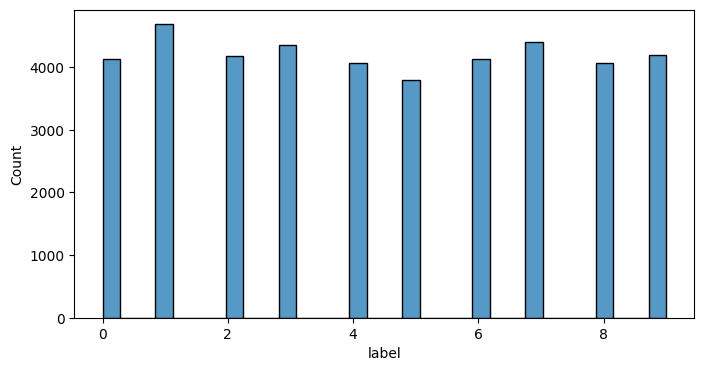

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(train_df['label'])
plt.show()

In [13]:
train_df.describe()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [14]:
y_train = train_df.label
X_train = train_df.loc[:, train_df.columns != 'label']

In [15]:
num_classes = 10
epochs = 20

In [16]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

In [17]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test= test_data[:]/255

x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

In [18]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [19]:
print(x_train.shape)
print(x_test.shape)

(33600, 784)
(28000, 784)


In [20]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_train.shape

(33600, 28, 28, 1)

In [54]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [55]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.25),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])


In [56]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                173088    
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                      

In [57]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=80,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/80
9/9 [==============================] - 1s 50ms/step - loss: 2.0432 - accuracy: 0.3893 - val_loss: 1.5172 - val_accuracy: 0.6911
Epoch 2/80
9/9 [==============================] - 0s 31ms/step - loss: 1.1940 - accuracy: 0.7535 - val_loss: 0.7822 - val_accuracy: 0.8327
Epoch 3/80
9/9 [==============================] - 0s 32ms/step - loss: 0.6404 - accuracy: 0.8417 - val_loss: 0.4874 - val_accuracy: 0.8637
Epoch 4/80
9/9 [==============================] - 0s 31ms/step - loss: 0.4451 - accuracy: 0.8715 - val_loss: 0.3877 - val_accuracy: 0.8839
Epoch 5/80
9/9 [==============================] - 0s 31ms/step - loss: 0.3702 - accuracy: 0.8908 - val_loss: 0.3368 - val_accuracy: 0.9013
Epoch 6/80
9/9 [==============================] - 0s 31ms/step - loss: 0.3272 - accuracy: 0.9040 - val_loss: 0.3055 - val_accuracy: 0.9099
Epoch 7/80
9/9 [==============================] - 0s 31ms/step - loss: 0.2978 - accuracy: 0.9127 - val_loss: 0.2839 - val_accuracy: 0.9169
Epoch 8/80
9/9 [===========

9/9 [==============================] - 0s 32ms/step - loss: 0.0539 - accuracy: 0.9842 - val_loss: 0.0713 - val_accuracy: 0.9790
Epoch 60/80
9/9 [==============================] - 0s 32ms/step - loss: 0.0525 - accuracy: 0.9845 - val_loss: 0.0716 - val_accuracy: 0.9796
Epoch 61/80
9/9 [==============================] - 0s 32ms/step - loss: 0.0519 - accuracy: 0.9847 - val_loss: 0.0700 - val_accuracy: 0.9794
Epoch 62/80
9/9 [==============================] - 0s 32ms/step - loss: 0.0516 - accuracy: 0.9841 - val_loss: 0.0700 - val_accuracy: 0.9789
Epoch 63/80
9/9 [==============================] - 0s 31ms/step - loss: 0.0497 - accuracy: 0.9849 - val_loss: 0.0707 - val_accuracy: 0.9794
Epoch 64/80
9/9 [==============================] - 0s 31ms/step - loss: 0.0498 - accuracy: 0.9858 - val_loss: 0.0702 - val_accuracy: 0.9785
Epoch 65/80
9/9 [==============================] - 0s 32ms/step - loss: 0.0493 - accuracy: 0.9854 - val_loss: 0.0684 - val_accuracy: 0.9795
Epoch 66/80
9/9 [===============

In [58]:
scores = cnn_model.evaluate(x_validate,y_validate)
print(f"Test Accuracy: {scores[1]*100}")

263/263 [==============================] - 1s 3ms/step - loss: 0.0627 - accuracy: 0.9810
Test Accuracy: 98.09523820877075


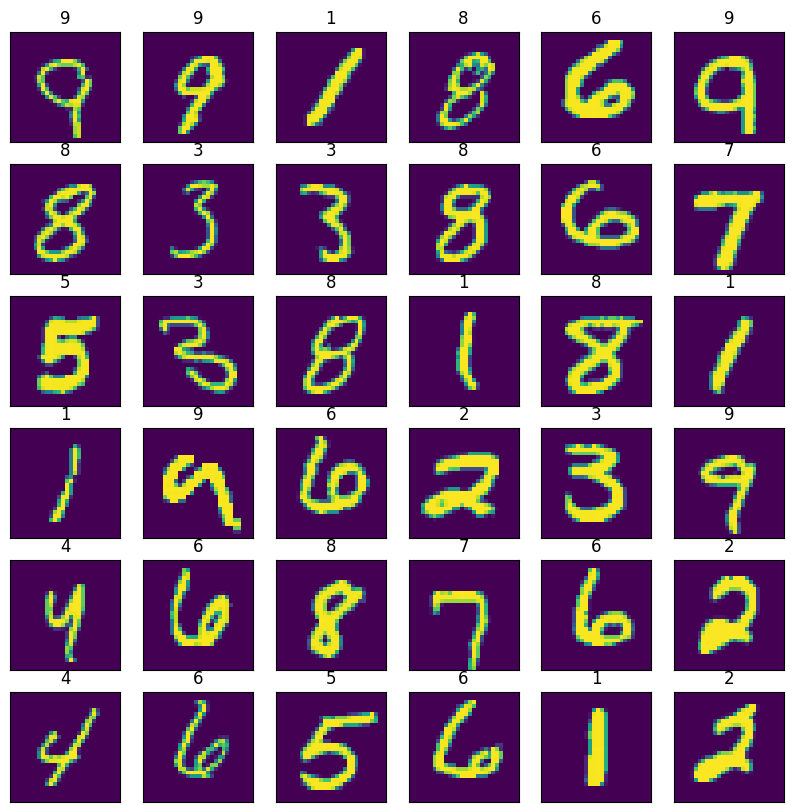

In [59]:
class_names = [str(i) for i in range(10)]
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [60]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Train - Accuracy')

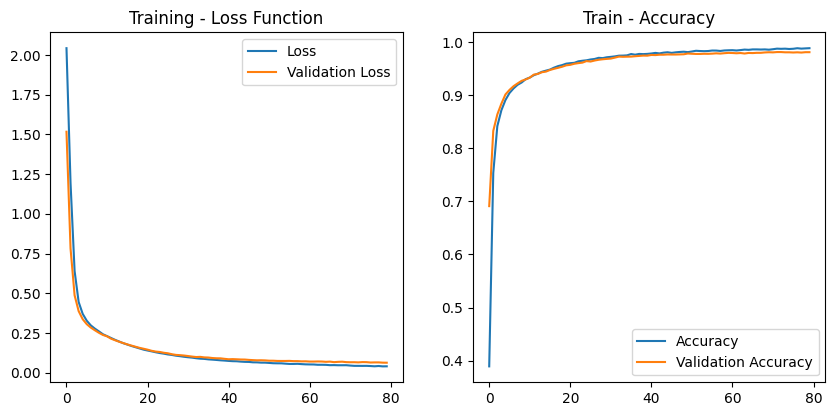

In [61]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [62]:
cnn_array = cnn_model.predict(x_validate)

263/263 [==============================] - 1s 3ms/step


In [63]:
cnn_array[0]


array([1.41146475e-05, 9.99731362e-01, 7.22421782e-06, 2.92465484e-06,
       8.31062425e-06, 5.25891228e-05, 6.36586992e-05, 3.21116931e-05,
       8.61273293e-05, 1.56437011e-06], dtype=float32)

In [64]:
cnn_label_array = [np.argmax(cnn_array[i]) for i in range(len(cnn_array))]

In [65]:
cnn_output_df = pd.DataFrame()
cnn_output_df['Label'] = cnn_label_array
cnn_output_df.index +=1
cnn_output_df.index.name = "ImageId"

In [66]:
cnn_output_df

,Label
ImageId,
1,1
2,4
3,3
4,9
5,4
...,...
8396,3
8397,4
8398,9


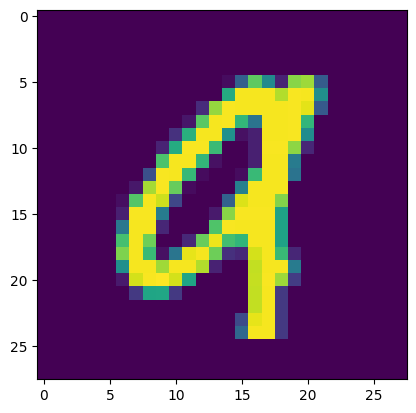

In [67]:
plt.imshow(x_validate[1][:,:,0])
plt.show()

1050/1050 [==============================] - 2s 2ms/step


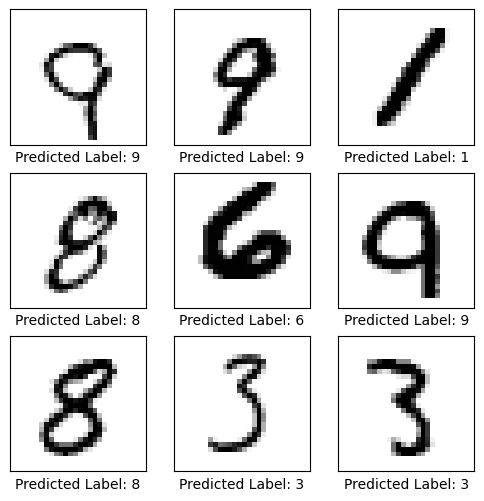

In [68]:
# Get the predictions on the test set
y_pred = cnn_model.predict(x_train)

# Convert the predictions to integer labels
y_pred = np.argmax(y_pred, axis=1)

# Plot some examples of the test set with their predicted labels
num_examples = 9
plt.figure(figsize=(6,6))
for i in range(num_examples):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel('Predicted Label: {}'.format(y_pred[i]))
plt.show()

In [74]:
print(classification_report(y_pred, y_train))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3281
           1       1.00      1.00      1.00      3767
           2       0.99      0.99      0.99      3347
           3       0.99      0.99      0.99      3440
           4       0.99      0.99      0.99      3265
           5       1.00      0.99      0.99      3027
           6       1.00      1.00      1.00      3326
           7       0.99      0.99      0.99      3579
           8       0.99      0.99      0.99      3245
           9       0.98      0.99      0.99      3323

    accuracy                           0.99     33600
   macro avg       0.99      0.99      0.99     33600
weighted avg       0.99      0.99      0.99     33600



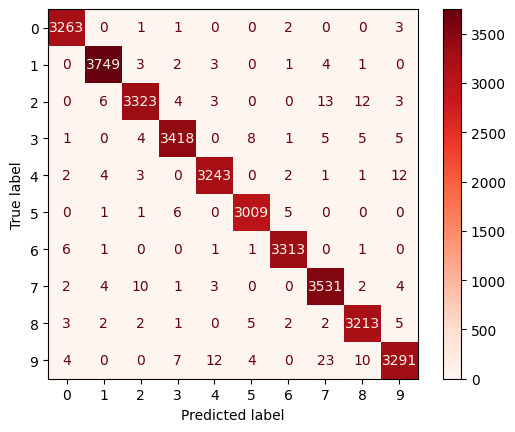

In [77]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred,
                                        display_labels = range(0,10),
                                        cmap=plt.cm.Reds)